In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models
from keras import layers
from keras.layers import Dropout
from keras.utils import to_categorical
import random
random.seed(1234)

C:\Users\xinyu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Normalization the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [4]:
history = network.fit(train_images, train_labels,epochs=20,batch_size=512,
                validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.4366 - acc: 0.8637 - val_loss: 0.3040 - val_acc: 0.9074
Epoch 2/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.1364 - acc: 0.9585 - val_loss: 0.2886 - val_acc: 0.9215
Epoch 3/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0859 - acc: 0.9736 - val_loss: 0.0858 - val_acc: 0.9748
Epoch 4/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0569 - acc: 0.9823 - val_loss: 0.0698 - val_acc: 0.9805
Epoch 5/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.0411 - acc: 0.9872 - val_loss: 0.1223 - val_acc: 0.9689
Epoch 6/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.0336 - acc: 0.9897 - val_loss: 0.1033 - val_acc: 0.9747
Epoch 7/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0256 - acc: 0.9919 - val_loss: 0.0801 - 

In [6]:
def plot_training_loss(history, validation_loss=True):
    history_dict = history.history
    loss_values = history_dict['loss']
    if validation_loss==True:
        val_loss_values = history_dict['val_loss']
    acc_values = history_dict['acc']
    epochs = range(1, len(acc_values) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    if validation_loss==True:
        plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

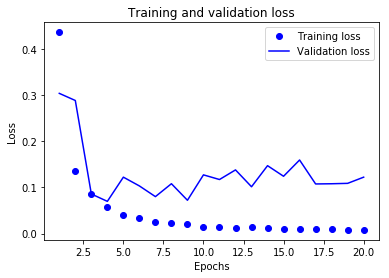

In [8]:
plot_training_loss(history)

In [4]:
network2 = models.Sequential()
network2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network2.add(Dropout(0.5, input_shape=(28 * 28,)))
network2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network2.add(Dropout(0.5, input_shape=(28 * 28,)))
network2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network2.add(Dropout(0.5, input_shape=(28 * 28,)))
network2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network2.add(Dropout(0.5, input_shape=(28 * 28,)))
network2.add(layers.Dense(10, activation='softmax'))
network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [29]:
history2 = network2.fit(train_images, train_labels,epochs=20,batch_size=512,
                validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.6536 - acc: 0.7867 - val_loss: 0.2105 - val_acc: 0.9360
Epoch 2/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.2424 - acc: 0.9293 - val_loss: 0.1330 - val_acc: 0.9602
Epoch 3/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.1837 - acc: 0.9474 - val_loss: 0.1117 - val_acc: 0.9673
Epoch 4/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.1537 - acc: 0.9566 - val_loss: 0.0966 - val_acc: 0.9719
Epoch 5/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.1340 - acc: 0.9626 - val_loss: 0.0925 - val_acc: 0.9748
Epoch 6/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.1200 - acc: 0.9663 - val_loss: 0.0966 - val_acc: 0.9744
Epoch 7/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.1132 - acc: 0.9686 - val_loss: 0.

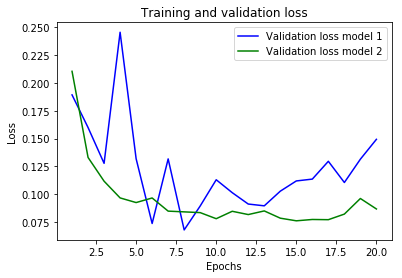

In [43]:
history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']
acc_values2 = history_dict2['acc']

epochs = range(1, len(acc_values2) + 1)

plt.plot(epochs, val_loss_values, 'b', label='Validation loss model 1')
plt.plot(epochs, val_loss_values2, 'g', label='Validation loss model 2')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [36]:
from keras import regularizers

In [39]:
network3 = models.Sequential()
network3.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(28 * 28,)))
network3.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(28 * 28,)))
network3.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(28 * 28,)))
network3.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(28 * 28,)))
network3.add(layers.Dense(10, activation='softmax'))
network3.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [40]:
history3 = network3.fit(train_images, train_labels,epochs=20,batch_size=512,
                validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 161us/step - loss: 12.1049 - acc: 0.6936 - val_loss: 3.4833 - val_acc: 0.7835
Epoch 2/20
60000/60000 [==============================] - 9s 151us/step - loss: 2.7123 - acc: 0.8073 - val_loss: 2.2042 - val_acc: 0.8585
Epoch 3/20
60000/60000 [==============================] - 9s 154us/step - loss: 2.0241 - acc: 0.8468 - val_loss: 1.8840 - val_acc: 0.8657
Epoch 4/20
60000/60000 [==============================] - 9s 150us/step - loss: 1.7512 - acc: 0.8704 - val_loss: 1.6753 - val_acc: 0.8791
Epoch 5/20
60000/60000 [==============================] - 9s 151us/step - loss: 1.5907 - acc: 0.8867 - val_loss: 1.5475 - val_acc: 0.8895
Epoch 6/20
60000/60000 [==============================] - 9s 151us/step - loss: 1.4788 - acc: 0.8975 - val_loss: 1.3949 - val_acc: 0.9164
Epoch 7/20
60000/60000 [==============================] - 9s 152us/step - loss: 1.3891 - acc: 0.9079 - val_loss: 1.3718 

In [41]:
network4 = models.Sequential()
network4.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28 * 28,)))
network4.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28 * 28,)))
network4.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28 * 28,)))
network4.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28 * 28,)))
network4.add(layers.Dense(10, activation='softmax'))
network4.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [42]:
history4 = network4.fit(train_images, train_labels,epochs=20,batch_size=512,
                validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 151us/step - loss: 1.6671 - acc: 0.8398 - val_loss: 1.0756 - val_acc: 0.8884
Epoch 2/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.7239 - acc: 0.9396 - val_loss: 0.5307 - val_acc: 0.9524
Epoch 3/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.4576 - acc: 0.9558 - val_loss: 0.7988 - val_acc: 0.8378
Epoch 4/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.3509 - acc: 0.9621 - val_loss: 0.3684 - val_acc: 0.9484
Epoch 5/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.2948 - acc: 0.9667 - val_loss: 0.3645 - val_acc: 0.9431
Epoch 6/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.2578 - acc: 0.9714 - val_loss: 0.2883 - val_acc: 0.9593
Epoch 7/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.2313 - acc: 0.9732 - val_loss: 0.2450 - 

In [46]:
history_dict3 = history3.history
loss_values3 = history_dict3['loss']
val_loss_values3 = history_dict3['val_loss']
acc_values3 = history_dict3['acc']
history_dict4 = history4.history
loss_values4 = history_dict4['loss']
val_loss_values4 = history_dict4['val_loss']
acc_values4 = history_dict4['acc']

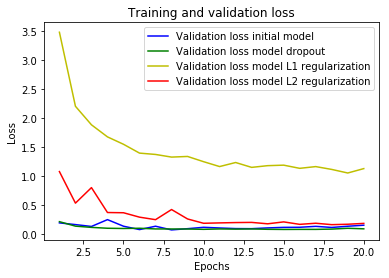

In [48]:
epochs = range(1, len(acc_values2) + 1)

plt.plot(epochs, val_loss_values, 'b', label='Validation loss initial model')
plt.plot(epochs, val_loss_values2, 'g', label='Validation loss model dropout')
plt.plot(epochs, val_loss_values3, 'y', label='Validation loss model L1 regularization')
plt.plot(epochs, val_loss_values4, 'r', label='Validation loss model L2 regularization')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

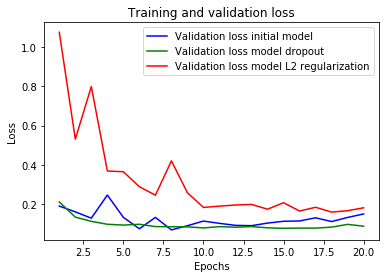

In [49]:
plt.plot(epochs, val_loss_values, 'b', label='Validation loss initial model')
plt.plot(epochs, val_loss_values2, 'g', label='Validation loss model dropout')
#plt.plot(epochs, val_loss_values3, 'y', label='Validation loss model L1 regularization')
# worst
plt.plot(epochs, val_loss_values4, 'r', label='Validation loss model L2 regularization')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

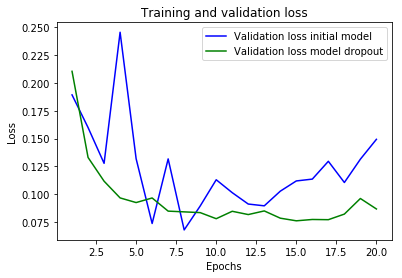

In [50]:
plt.plot(epochs, val_loss_values, 'b', label='Validation loss initial model')
plt.plot(epochs, val_loss_values2, 'g', label='Validation loss model dropout')
#plt.plot(epochs, val_loss_values3, 'y', label='Validation loss model L1 regularization')
# worst
#plt.plot(epochs, val_loss_values4, 'r', label='Validation loss model L2 regularization')
# second worst
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# It seems that the dropout model is the best

In [5]:
history5 = network2.fit(train_images, train_labels,epochs=20,batch_size=512)

Epoch 1/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.6480 - acc: 0.7869
Epoch 2/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.2420 - acc: 0.9301
Epoch 3/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.1848 - acc: 0.9479
Epoch 4/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.1531 - acc: 0.9568
Epoch 5/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.1364 - acc: 0.9618
Epoch 6/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.1195 - acc: 0.9662
Epoch 7/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.1092 - acc: 0.9693
Epoch 8/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.1024 - acc: 0.9713
Epoch 9/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.0966 - acc: 0.9734
Epoch 10/20
60000/60000 [==============================] - 11s 176us/step - loss: 

In [7]:
train_loss, train_acc = network2.evaluate(train_images, train_labels)

60000/60000 [==============================] - 9s 152us/step


In [8]:
train_loss

0.015608965282625491

In [9]:
train_acc

0.9959166666666667

In [11]:
test_loss, test_acc = network2.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 151us/step


In [12]:
test_loss

0.07547955173136474

In [13]:
test_acc

0.983

# It's better than 0.96% accuracy of the example in the book